### "Шапка" с названием проекта

В этой ячейке вы найдете оглавление и ключевые этапы работы, которые помогут вам ориентироваться в процессе выполнения проекта. Проект разделен на пять основных этапов, четыре из которых (этапы 2, 3, 4 и 5) вам предлагается выполнить в этом Jupyter Notebook:

- Подготовка среды MLflow - Первый шаг, подготовка и запуск сервисов MLflow, был выполнен вне ноутбука и оформлен в виде shell скрипта. Это основа для работы с экспериментами и логирования результатов ваших моделей.

- Этап 2 - Исследовательский Анализ Данных (EDA): На этом этапе вы проведете тщательный анализ данных, чтобы лучше понять их структуру и особенности.

- Этап 3 - Генерация Признаков и Обучение Модели: После анализа данных вы сгенерируете новые признаки и обучите модель, используя эти признаки.

- Этап 4 - Отбор Признаков и Обучение Модели: На этом шаге вы отберете наиболее значимые признаки и снова обучите модель для улучшения ее качества.

- Этап 5 - Подбор Гиперпараметров и Обучение Финальной Версии Модели: Финальный этап проекта посвящен оптимизации гиперпараметров для достижения максимального качества модели.

Для удобства навигации и организации работы, пожалуйста, следуйте оглавлению и рекомендациям, описанным в каждом этапе.

> ### Важно: Переобучение моделей
> На каждом этапе проекта, где требуется переобучение модели, важно не просто выполнить эту процедуру, но и тщательно проверить качество модели на соответствующих выборках. Это включает в себя анализ метрик качества, визуализацию результатов, сравнение с предыдущими моделями и, при необходимости, корректировку.

> ### Важно: Разделение выборок
> Перед началом выполнения вашего проекта важно правильно подготовить данные, разделив их на подвыборки. Это позволит оценить производительность модели более объективно и управлять риском переобучения. В зависимости от ваших целей и доступных данных, вы можете использовать различные стратегии разделения:

1. Разделение на train/val/test: Это классический подход, где данные делятся на три части. Обучающая выборка (train) используется для первичного обучения моделей, валидационная (val) - для настройки гиперпараметров и выбора лучшей модели, а тестовая (test) - для финальной оценки производительности модели. Такой подход идеален, если у вас достаточно данных, чтобы разделить их и каждая из выборок была репрезентативна.

2. Разделение на train/test с кросс-валидацией на train: Если данных недостаточно для трех подвыборок, можно ограничиться разделением на обучающую и тестовую выборки. В этом случае кросс-валидация на обучающей выборке поможет оценить стабильность модели и подобрать гиперпараметры.

Определение способа разделения данных: Выбор метода разбиения данных на подвыборки — train, validation и test — должен быть обоснован особенностями вашего набора данных и задачами проекта. Возможные методы разделения, включая различные стратегии и правила, подробно описаны в [документации scikit-learn по разбиению данных](https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_indices.html#sphx-glr-auto-examples-model-selection-plot-cv-indices-py). Вы можете следовать этим примерам или разработать собственный метод, исходя из специфики ваших данных.

Ваша задача - выбрать подходящий метод разделения данных исходя из объема и специфики ваших данных. Помните, что финальные метрики качества модели мы будем оценивать на тестовой выборке. Промежуточные результаты после каждого этапа проекта (например, после настройки гиперпараметров) следует оценивать на валидационной выборке, если таковая имеется. Это поможет вам корректно настроить модель перед финальной оценкой её производительности.

In [2]:
# сделайте разделение изначального набора данных в этой ячейке
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import os

# загружаем данные из sprint 1: update_data.csv
if os.path.exists('../data/initial_data.csv'):
    df = pd.read_csv('../data/initial_data.csv')

print(df.shape)

target= 'price' 

# разбиение на выборки
df_train, df_validate, df_test = \
    np.split(df.sample(frac=1, random_state=42),
             [int(0.6*len(df)), int(0.8*len(df))])

print('numpy split X_train: ', df_train.drop(columns=['price']).shape, ' df_validate: ', df_validate.drop(columns=['price']).shape, ' df_test: ', df_test.drop(columns=['price']).shape)

X_train = df_train.drop(columns=['price'])
y_train = df_train['price']

X_valid = df_validate.drop(columns=['price'])
y_valid = df_validate['price']

X_test = df_test.drop(columns=['price'])
y_test = df_test['price']

(123937, 19)
numpy split X_train:  (74362, 18)  df_validate:  (24787, 18)  df_test:  (24788, 18)


In [3]:
X_train.head(5)

,id,floor,is_apartment,kitchen_area,living_area,rooms,studio,total_area,building_id,build_year,building_type_int,latitude,longitude,ceiling_height,flats_count,floors_total,has_elevator,build_type_floors
103656,118258,1,0,8.000000,34.000000,3,0,57.000000,14490,1985,6,55.814289,37.817036,2.48,111,16,1,high_rise
33392,37912,2,0,9.000000,27.000000,1,0,36.000000,16266,1995,4,55.652931,37.746994,2.64,83,10,1,high_rise
62330,71079,3,0,10.000000,18.000000,1,0,44.200001,2418,1958,1,55.810669,37.638306,3.00,290,11,1,high_rise
52090,59382,12,0,9.000000,36.700001,2,0,76.000000,22118,2012,2,55.828106,37.487892,3.00,141,30,1,high_rise
95519,108995,14,0,97.099998,53.000000,3,0,97.099998,20818,2008,2,55.704510,37.512836,3.00,414,24,1,high_rise


#### Этап 2: Исследовательский Анализ Данных (EDA)
На этом этапе ваша задача - провести тщательный исследовательский анализ данных (EDA), чтобы глубже понять особенности и связи в предоставленном наборе данных. В процессе EDA вы должны обратить внимание на три ключевых аспекта, о которых мы говорили в теме 3 курса. Очень важно, чтобы все результаты вашего исследования, включая визуализации, статистический анализ и предварительные выводы, были аккуратно залогированы в MLflow.

Для более организованного исследования предлагаем следующие рекомендуемые шаги:
- Понимание данных: Первоначально ознакомьтесь с данными, изучите типы данных, проверьте наличие пропущенных значений.
- Визуализация данных: Используйте графики и диаграммы для визуализации распределений признаков и возможных взаимосвязей между ними.
- Статистический анализ: Примените статистические методы для изучения центральных тенденций, разброса и корреляций между признаками.
- Предварительные выводы: На основе проведённого анализа сформулируйте предварительные выводы о данных, которые помогут в дальнейшем этапе моделирования.

Помните, что EDA - это итеративный процесс, в котором вы можете возвращаться к предыдущим шагам для дополнительного анализа, если это будет необходимо. Все находки и выводы должны быть чётко зафиксированы и легко доступны для команды проекта.


In [35]:
# 2.1 Загрузка данных
import psycopg
from dotenv import load_dotenv

TABLE_NAME = "clean_cost_estimate" 

# подгружаем .env
load_dotenv()

# загрузка данных для обучения модели
connection = {"sslmode": "require", "target_session_attrs": "read-write"}
postgres_credentials = {
    "host": os.getenv("DB_DESTINATION_HOST"),
    "port": os.getenv("DB_DESTINATION_PORT"),
    "dbname": os.getenv("DB_DESTINATION_NAME"),
    "user": os.getenv("DB_DESTINATION_USER"),
    "password": os.getenv("DB_DESTINATION_PASSWORD"),
}

connection.update(postgres_credentials)

with psycopg.connect(**connection) as conn:

    with conn.cursor() as cur:
        cur.execute(f"SELECT * FROM {TABLE_NAME}")
        data = cur.fetchall()
        columns = [col[0] for col in cur.description]

df = pd.DataFrame(data, columns=columns)

# сохраняем данные
os.makedirs('../data', exist_ok=True)
with open('../data/initial_data.csv', 'wb') as fd:
    df.to_csv('../data/initial_data.csv', index=None)

In [60]:
df.head(5)

,id,floor,is_apartment,kitchen_area,living_area,rooms,studio,total_area,price,building_id,build_year,building_type_int,latitude,longitude,ceiling_height,flats_count,floors_total,has_elevator,build_type_floors
0,0,9,0,9.9,19.900000,1,0,35.099998,9500000,6220,1965,6,55.717113,37.781120,2.64,84,12,1,high_rise
1,1,7,0,43.0,16.600000,1,0,43.000000,13500000,18012,2001,2,55.794849,37.608013,3.00,97,10,1,high_rise
2,2,9,0,9.0,32.000000,2,0,56.000000,13500000,17821,2000,4,55.740040,37.761742,2.70,80,10,1,high_rise
3,3,1,0,10.1,43.099998,3,0,76.000000,20000000,18579,2002,4,55.672016,37.570877,2.64,771,17,1,high_rise
4,4,3,0,3.0,14.000000,1,0,24.000000,5200000,9293,1971,1,55.808807,37.707306,2.60,208,9,1,multy_story


In [ ]:
# 2.2. Общий обзор датасета

# базовая информация
df.info()
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123937 entries, 0 to 123936
Data columns (total 26 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   floor                   123937 non-null  int64  
 1   is_apartment            123937 non-null  int64  
 2   kitchen_area            123937 non-null  float64
 3   living_area             123937 non-null  float64
 4   rooms                   123937 non-null  int64  
 5   studio                  123937 non-null  int64  
 6   total_area              123937 non-null  float64
 7   price                   123937 non-null  int64  
 8   build_year              123937 non-null  int64  
 9   building_type_int       123937 non-null  int64  
 10  ceiling_height          123937 non-null  float64
 11  flats_count             123937 non-null  int64  
 12  floors_total            123937 non-null  int64  
 13  has_elevator            123937 non-null  int64  
 14  build_type_floors   

,count,mean,std,min,25%,50%,75%,max
floor,123937.0,7.443806e+00,5.689226e+00,1.000000,3.000000e+00,6.000000e+00,1.000000e+01,5.600000e+01
is_apartment,123937.0,9.480623e-03,9.690623e-02,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
kitchen_area,123937.0,1.084924e+01,7.316802e+00,0.100000,7.000000e+00,9.000000e+00,1.150000e+01,4.363000e+02
living_area,123937.0,3.877845e+01,2.987327e+01,2.000000,2.160000e+01,3.200000e+01,4.480000e+01,8.363636e+02
rooms,123937.0,2.119416e+00,9.872045e-01,1.000000,1.000000e+00,2.000000e+00,3.000000e+00,2.000000e+01
studio,123937.0,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
total_area,123937.0,6.172883e+01,3.931421e+01,11.000000,3.910000e+01,5.250000e+01,7.100000e+01,9.200000e+02
price,123937.0,1.923366e+07,6.890131e+07,10000.000000,8.900000e+06,1.180000e+07,1.670000e+07,9.873738e+09
build_year,123937.0,1.986386e+03,2.200538e+01,1901.000000,1.969000e+03,1.984000e+03,2.006000e+03,2.023000e+03
building_type_int,123937.0,3.248013e+00,1.459814e+00,0.000000,2.000000e+00,4.000000e+00,4.000000e+00,6.000000e+00


In [3]:
# проверка пропусков
missing = df.isnull().mean().sort_values(ascending=False)
missing[missing > 0]

Series([], dtype: float64)

In [ ]:

from sklearn.cluster import KMeans
from sklearn.neighbors import BallTree
import numpy as np
import geopy.distance
    
# Создаем дополнительные признаки
df['age'] = pd.Timestamp('today').year - df['build_year'] # возраст дома
df['floor_ratio'] = df['floor']/df['floors_total']
df['kitchen_ratio'] = df['kitchen_area'].div(df['total_area'], axis=0)
df['living_ratio'] = df['living_area']/df['total_area'].values

# агрегируем по building_id
df["building_price_mean"] = df.groupby("building_id")["price"].transform("mean")
df["building_area_mean"] = df.groupby("building_id")["total_area"].transform("mean")

# кластеризация по координатам
coords = df[["latitude","longitude"]].dropna()
kmeans = KMeans(n_clusters=10, random_state=42)
df.loc[coords.index, "location_cluster"] = kmeans.fit_predict(coords)
df["location_cluster"] = df["location_cluster"].astype("int")

# кластеризация по высоте потолка
coords = df[["ceiling_height"]].dropna()
kmeans = KMeans(n_clusters=6, random_state=42)
df.loc[coords.index, "ceiling_height_cluster"] = kmeans.fit_predict(coords)
df["ceiling_height_cluster"] = df["ceiling_height_cluster"].astype("int")

# кластеризация по количеству квартир в доме
coords = df[["flats_count"]].dropna()
kmeans = KMeans(n_clusters=10, random_state=42)
df.loc[coords.index, "flats_count_cluster"] = kmeans.fit_predict(coords)
df["flats_count_cluster"] = df["flats_count_cluster"].astype("int")

# в качестве фичи будем использовать удаленность от центра Москвы
# добавим служебные колонки с координататми центра Москвы
df["latitude_2"] = 55.7522
df["longitude_2"] = 37.6156

# вычислим дистанцию
df['dist_origin_dest'] = list(map(geopy.distance.geodesic, df.loc[:, ['latitude', 'longitude']].values, df.loc[:, ["latitude_2", "longitude_2"]].values))
# приведем ее к типу float
df['dist_origin_dest'] = df['dist_origin_dest'].map(lambda x: x.km)

# загружаем данные moscow_metro_stations.csv
if os.path.exists('../data/moscow_metro_stations.csv'):
    df_moscow = pd.read_csv('../data/moscow_metro_stations.csv')

# Оставляем нужные столбцы и переименовываем
# столбцыслужебные не удаляем
moscow_stations = df_moscow.drop(columns=['id', 'line_id', 'line_name', 'line_color'])
moscow_stations.columns = ['station_name', 'lat', 'lon']
        
metro_coords = np.radians([[s.lat, s.lon] for s in moscow_stations.itertuples()])

# Строим дерево
tree = BallTree(metro_coords, metric='haversine')

# Координаты квартир в радианах
flat_coords = np.radians(df[["latitude", "longitude"]].values)
flat_coords[:5]

# Ищем ближайшую станцию
distances_rad, _ = tree.query(flat_coords, k=1)
# Переводим в метры (радиус Земли ~6371 км)
df["distance_to_metro_fast"] = distances_rad[:, 0] * 6371000

# удалим служебные колонки и уже не нужные колонки с координататми
df.drop(columns=['latitude', 'longitude', 'latitude_2', 'longitude_2'], inplace=True)


In [13]:
df.head()

,floor,is_apartment,kitchen_area,living_area,rooms,studio,total_area,price,build_year,building_type_int,ceiling_height,flats_count,floors_total,has_elevator,build_type_floors,age,floor_ratio,kitchen_ratio,living_ratio,building_price_mean,building_area_mean,location_cluster,dist_origin_dest,distance_to_metro_fast,ceiling_height_cluster,flats_count_cluster
0,9,0,9.9,19.900000,1,0,35.099998,9500000,1965,6,2.64,84,12,1,high_rise,60,0.750000,0.282051,0.566952,9.100000e+06,41.049999,9,11.107508,732.967724,0,5
1,7,0,16.6,26.400000,1,0,43.000000,13500000,2001,2,3.00,97,10,1,high_rise,24,0.700000,0.386047,0.613953,1.873333e+07,55.966667,1,4.772297,525.649516,4,7
2,9,0,9.0,32.000000,2,0,56.000000,13500000,2000,4,2.70,80,10,1,high_rise,25,0.900000,0.160714,0.571429,1.518333e+07,60.533333,9,9.277185,538.689763,5,5
3,1,0,10.1,43.099998,3,0,76.000000,20000000,2002,4,2.64,771,17,1,high_rise,23,0.058824,0.132895,0.567105,1.477082e+07,50.200000,7,9.359522,815.506000,0,8
4,3,0,3.0,14.000000,1,0,24.000000,5200000,1971,1,2.60,208,9,1,multy_story,54,0.333333,0.125000,0.583333,7.580000e+06,28.218750,1,8.534197,1442.654973,0,1


In [ ]:
import pandas as pd
import numpy as np
import os

# сохраняем данные
os.makedirs('../data', exist_ok=True)
with open('../data/transform_data.csv', 'wb') as fd:
    df.to_csv('../data/transform_data.csv', index=None)

In [1]:
import pandas as pd
import numpy as np
import os

# загружаем данные: update_data.csv
if os.path.exists('../data/transform_data.csv'):
    df = pd.read_csv('../data/transform_data.csv')

In [ ]:
missing = df.isnull().sum().sort_values(ascending=False).T
missing[missing > 0]

Series([], dtype: int64)

In [5]:
df.columns

Index(['floor', 'is_apartment', 'kitchen_area', 'living_area', 'rooms',
       'studio', 'total_area', 'price', 'build_year', 'building_type_int',
       'ceiling_height', 'flats_count', 'floors_total', 'has_elevator',
       'build_type_floors', 'age', 'floor_ratio', 'kitchen_ratio',
       'living_ratio', 'building_price_mean', 'building_area_mean',
       'location_cluster', 'dist_origin_dest', 'distance_to_metro_fast',
       'ceiling_height_cluster', 'flats_count_cluster'],
      dtype='object')

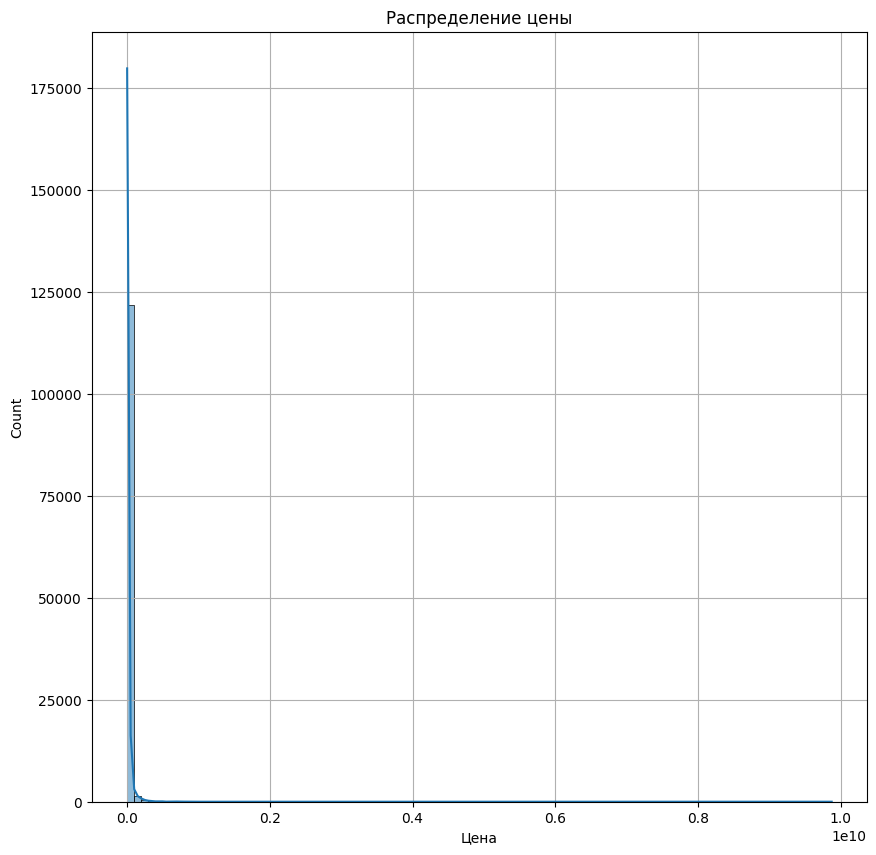

In [4]:
# 1) Распределение основной целевой переменной price

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 10))
sns.histplot(df['price'], bins=100, kde=True)
plt.title('Распределение цены')
plt.xlabel('Цена')
plt.grid(True)

ASSETS_DIR = '../assets'
plt.savefig(os.path.join(ASSETS_DIR, 'Distribution_main_target_variable'))

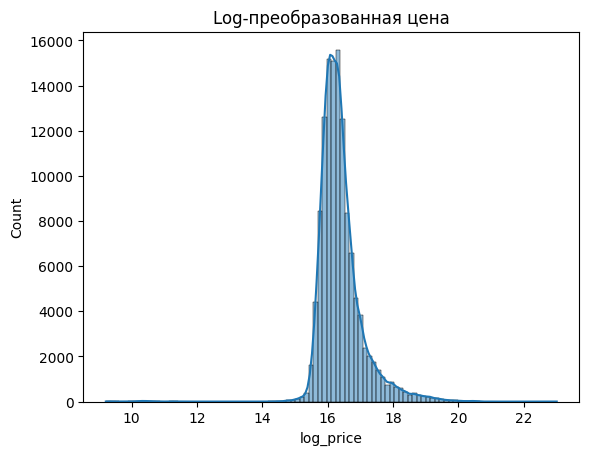

In [5]:
# 2) Также можно посмотреть логарифм:

df['log_price'] = np.log1p(df['price'])

sns.histplot(df['log_price'], bins=100, kde=True)
plt.title('Log-преобразованная цена')

ASSETS_DIR = '../assets'
plt.savefig(os.path.join(ASSETS_DIR, 'Distribution_main_target_variable_log'))

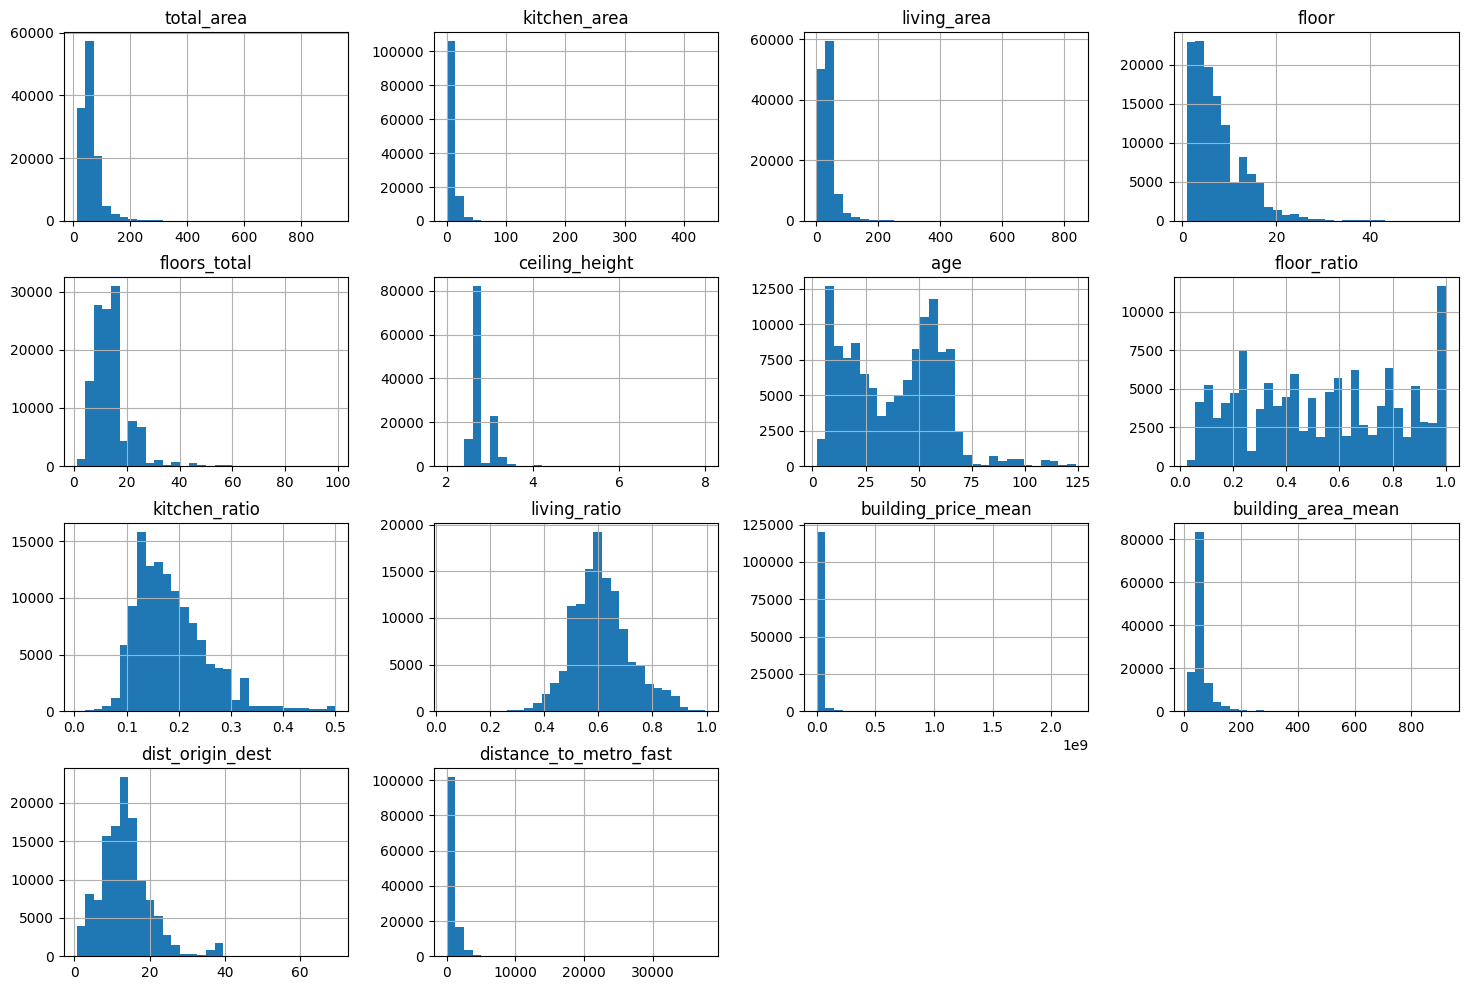

In [6]:
# 3) Посмотрим pаспределения ключевых признаков

numeric_features = [
    'total_area', 'kitchen_area', 'living_area', 'floor', 'floors_total',
    'ceiling_height', 'age', 'floor_ratio', 'kitchen_ratio', 'living_ratio',
    'building_price_mean', 'building_area_mean', 'dist_origin_dest',
    'distance_to_metro_fast'
]

df[numeric_features].hist(bins=30, figsize=(18, 12), grid=True)

ASSETS_DIR = '../assets'
plt.savefig(os.path.join(ASSETS_DIR, 'Distribution_main_features'))

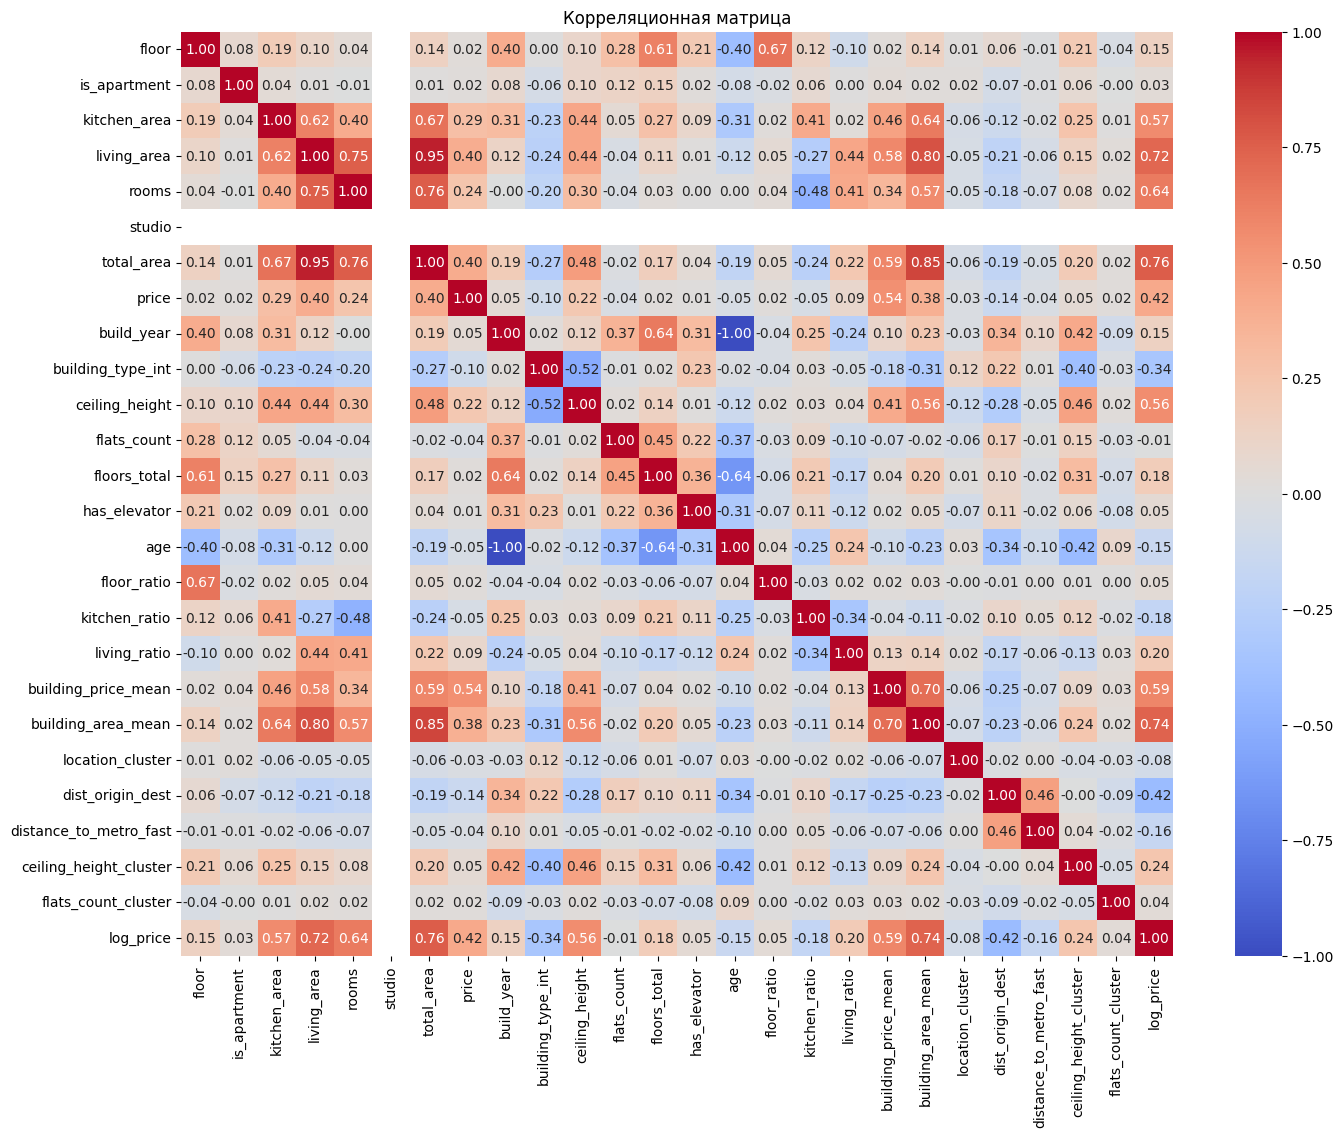

In [18]:
# 4) Проведем корреляционный анализ

plt.figure(figsize=(16, 12))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Корреляционная матрица')
# Особое внимание — на корреляции с price или log_price.

ASSETS_DIR = '../assets'
plt.savefig(os.path.join(ASSETS_DIR, 'Correlation_matrix'))

In [ ]:
# a) Целевая переменная price и log_price
# price и log_price неожиданно не сильно коррелируют между собой (0.42), но log_price сильнее и чище коррелирует 
# с признаками, поэтому лучше подходит для моделей (возможно нужно будет оставить ее)

# b) Наиболее сильные корреляты log_price (новой целевой переменной) => увеличение стоимости:
total_area              = 0.76   # Сильнейший коррелят. Ожидаемо — чем больше площадь, тем дороже
building_area_mean      = 0.74   # Размер здания связан с ценой
living_area             = 0.72   # Поддерживает тренд общей площади
rooms                   = 0.64   # Больше комнат → дороже
building_price_mean     = 0.59   # отражает среднюю цену по зданию, мощный фич
kitchen_area            = 0.57	 # Похожий эффект как на жилой и общей площади
ceiling_height          = 0.56   # Высокие потолки чаще в премиальных квартирах
ceiling_height_cluster  = 0.24   # Отражает распределение потолков — слабая +
living_ratio            = 0.20   # Незначительная положительная 
flor_total              = 0.18   # незначительная положительная
floor                   = 0.15   # Незначительно положительная
build_year              = 0.15   # Незначительно положительная
has_elevator            = 0.05   # Слабо влияет на прямую
floor_ratio	            = 0.05   # Может быть связано с типом квартиры (на первом/последнем этажах)
flats_count_cluster	    = 0.04	 # слабо влияет на прямую

# с) Отрицательные корреляции с log_price (новой целевой переменной) => уменьшение стоимости:
dist_origin_dest        = -0.42	 # Удалённость от центра города - возможно связано с тем, что это данные по Москве
distance_to_metro_fast  = -0.16  # Чем дальше от метро, тем дешевле
building_type_int       = -0.34  # тип здания влияет на снижении цены
kitchen_ratio           = -0.18  # слабая отрицательная корреляция с ценой (возможно, отражает непропорционально большие кухни в дешёвых квартирах).
age	                    = -0.15	 # Старые здания — чуть дешевле

# в данном датасете - мусорный рекивит - studio (так как везде = 0)

# d) Мультиколлинеарность — признаки с сильной корреляцией между собой
living_area - total_area                    = 0.95	# Почти одно и то же, можно оставить один
total_area - building_area_mean             = 0.85 # Очень сильно связаны, возможно лучше оставить только один
living_area - building_area_mean            = 0.80 # Очень сильно связаны, возможно лучше оставить только один
rooms - living_area                         = 0.75	# Сильно связаны, возможно лучше оставить только один
building_price_mean - building_area_mean    = 0.70	# Сильно связаны, возможно лучше оставить только один
total_area - kitchen_area                   = 0.67 # Логичная корреляция
total_area - rooms                          = 0.76 # Чем больше площадь, тем больше комнат
floor - floors_total                        = 0.61	# Более высокие этажи в высотных домах

# Нужно проверить не чувствительна ли модель к мультиколлинеарности.

# is_apartment, building_type_int и has_elevator слабо коррелируют с ценой — возможно, имеют категориальный/непрямой эффект.

In [ ]:
# e) Промежуточные выводы: 
# Для моделей оставить log_price как целевую переменную.
# Проведи отбор признаков, чтобы избежать мультиколлинеарности.
# Используй total_area, building_area_mean, living_area, rooms , building_price_mean, kitchen_area, ceiling_height, 
# dist_origin_dest, distance_to_metro_fast, building_type_int как основу модели — они показывают сильную связь с ценой.
# Категориальные признаки (build_type_floors, location_cluster, ceiling_height_cluster, flats_count_cluster) могут быть 
# важны через one-hot или catboost encoding.

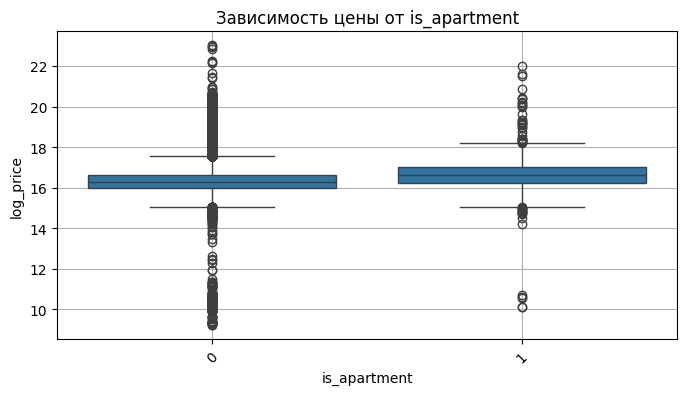

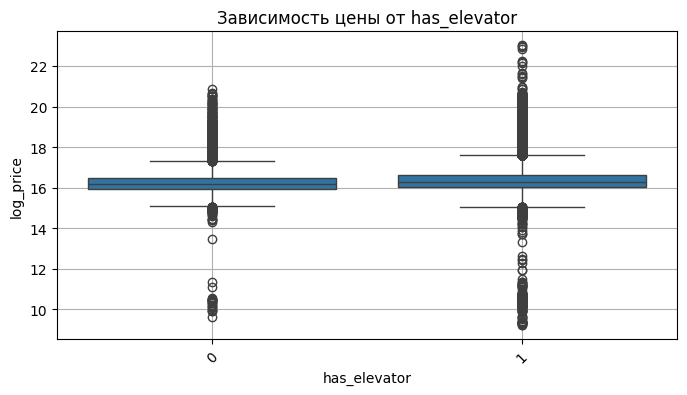

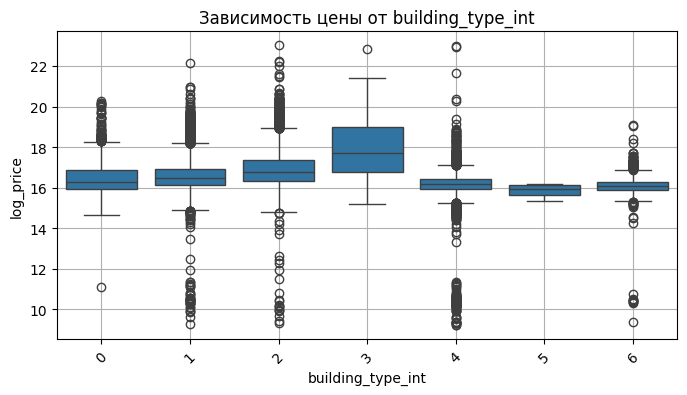

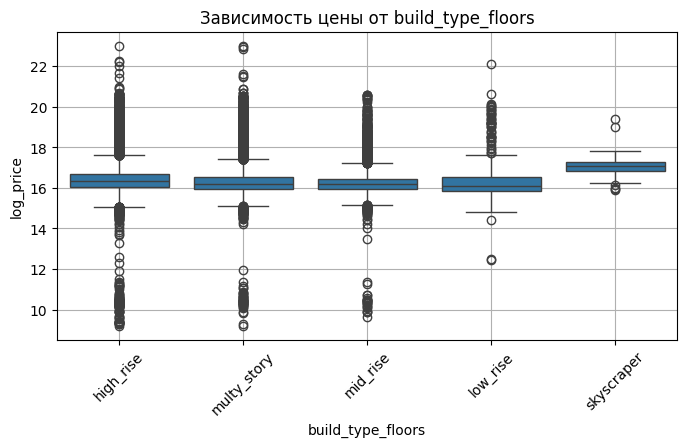

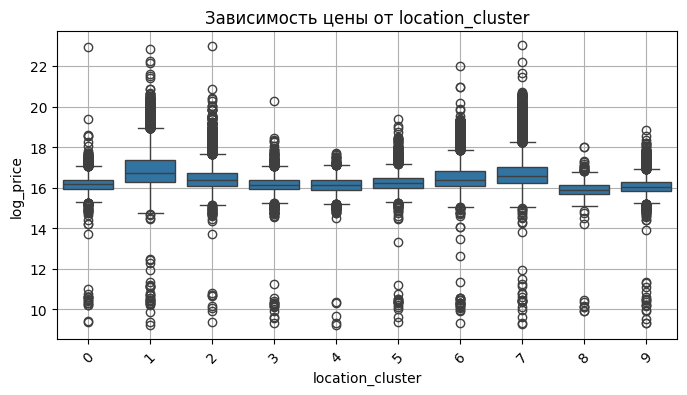

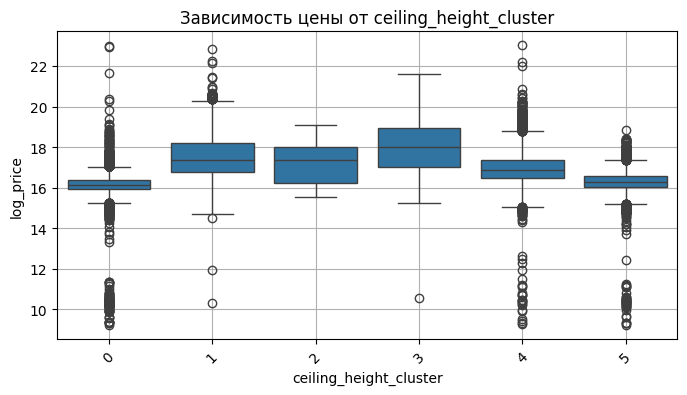

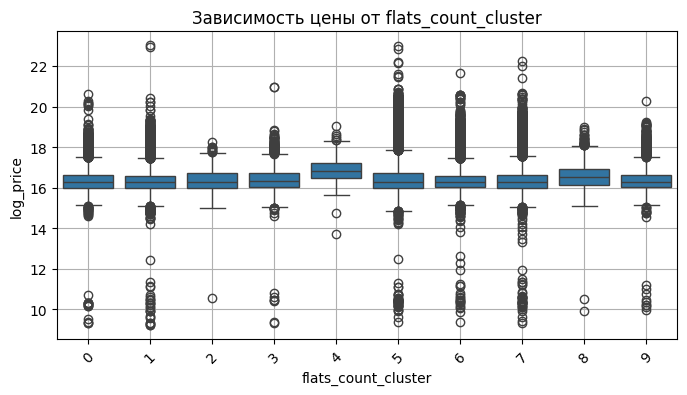

In [19]:
# 5) Исследование категориальных переменных
categorical = [
    'is_apartment', 'has_elevator', 'building_type_int',
    'build_type_floors', 'location_cluster', 'ceiling_height_cluster', 'flats_count_cluster'
]

for col in categorical:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=col, y='log_price', data=df)
    plt.title(f'Зависимость цены от {col}')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.savefig(os.path.join(ASSETS_DIR, f'Categorial_features_{col}'))


In [ ]:
# 1 - Зависимость цены (log_price) от is_apartment
# Две категории: обычная квартира (0) и апартаменты (1).
# Распределения очень похожи, но Медиана у апартаментов чуть выше.
# Цены на апартаменты в среднем на 20–25% ниже, чем на квартиры. 
# При этом их расположение часто бывает более удобным: апарт-комплексы 
# стараются строить в центре или вблизи важных городских объектов. 
# Цена — главный «козырь» апартаментов.
# Разброс цен шире у квартир (могут быть как дорогие высотки, так и недорогие многоэтажки), а
# апартаменты могут быть в обычных домах комфорт-класса
# Однако разница незначительная. Поэтому is_apartment имеет слабую предсказательную силу.
# Можно использовать как вспомогательный бинарный признак — особенно в сочетании с floors_total или
# dist_origin_dest, distance_to_metro_fast (например, если далеко от центра города или метро  — это может быть минус).

# 2 - Зависимость цены (log_price) от has_elevator
# Две категории: без лифта (0) и с лифтом (1).
# Распределения очень похожи, но Медиана у домов с лифтом чуть выше, что ожидаемо.
# Разброс цен шире у домов с лифтом (могут быть как дорогие высотки, так и недорогие многоэтажки).
# Однако разница незначительная. Поэтому has_elevator имеет слабую предсказательную силу.
# Можно использовать как вспомогательный бинарный признак — особенно в сочетании с location_cluster 
# или (например, если этажность > 5 и лифта нет — это может быть минус).

# 3 - Зависимость цены (log_price) от building_type_int
# Распределение цен различается между типами.
# Некоторые типы (например, 0, 1, 2 , 3) имеют высокие медианные значения log_price, что может говорить 
# о более элитных или новых домах. Вывод - признак location_cluster имеет информативность и отражает 
# ценовой уровень района, можно использовать в моделе (через OneHotEncoding).

# 4 - Зависимость цены (log_price) от build_type_floors
# Распределения очень похожи, но Медиана отличается незначительно.
# Разброс цен незначительный. Поэтому build_type_floors имеет слабую предсказательную силу.

# 5 - Зависимость цены (log_price) от location_cluster
# Распределение цен различается между кластерами.
# Некоторые кластеры (например, 1, 6, 7) имеют высокие медианные значения log_price, что может говорить 
# о более престижных или центральных районах.
# Другие кластеры (8, 3, 4) — с пониженными значениями, возможно, окраины.
# Вывод - признак location_cluster имеет информативность и отражает ценовой уровень района, можно использовать 
# в моделе (через OneHotEncoding).

# 6 - Зависимость цены (log_price) от ceiling_height_cluster
# Распределение цен различается между кластерами.
# Некоторые кластеры (например, 1, 2, 3) имеют высокие медианные значения log_price, но практически все
# распределение цент приходится на кластеры 0, 4, 5 что может говорить 
# о более престижных домах потолки выше, так класеты 1,2,3 - потолки выше 3.1 метра.
# Вывод - признак ceiling_height_cluster имеет информативность и отражает ценовой уровень квартиры, можно использовать 
# в моделе (через OneHotEncoding).

# 7 - Зависимость цены (log_price) от flats_count_cluster
# Распределения в основном в кластерах 1,2,5,6,7, но Медиана отличается незначительно.
# Разброс цен незначительный. Поэтому flats_count_cluster имеет слабую предсказательную силу.
# Можно использовать как вспомогательный категориальный признак в сочетании например с building_type_int или build_type_floors

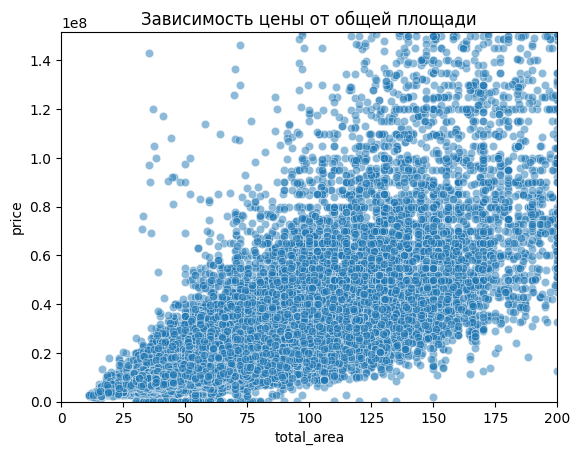

In [24]:
# 6) Зависимость цены от площади

sns.scatterplot(x='total_area', y='price', data=df, alpha=0.5)
plt.title('Зависимость цены от общей площади')
plt.xlim(0, 200)
plt.ylim(0, df['price'].quantile(0.99))

plt.savefig(os.path.join(ASSETS_DIR, 'Price_dependence_total_area'))

(0.0, 18.83725198589872)

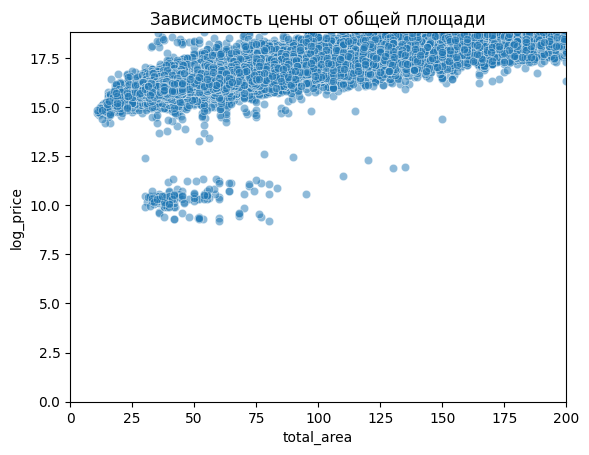

In [25]:
# 6) Зависимость цены от площади

sns.scatterplot(x='total_area', y='log_price', data=df, alpha=0.5)
plt.title('Зависимость цены от общей площади')
plt.xlim(0, 200)
plt.ylim(0, df['log_price'].quantile(0.99))

#plt.savefig(os.path.join(ASSETS_DIR, 'Price_dependence_total_area'))

In [ ]:
from scipy.stats import f_oneway, kruskal

categorical_features = ['is_apartment', 
                        'has_elevator', 
                        'building_type_int', 
                        'build_type_floors', 
                        'location_cluster', 
                        'ceiling_height_cluster', 
                        'flats_count_cluster']
results = {}

for feature in categorical_features:
    groups = [group['log_price'].values for _, group in df.groupby(feature)]
    
    # ANOVA
    anova_p = f_oneway(*groups).pvalue
    
    # Kruskal-Wallis
    kruskal_p = kruskal(*groups).pvalue
    
    results[feature] = {
        'ANOVA p-value': anova_p,
        'Kruskal-Wallis p-value': kruskal_p
    }

pd.DataFrame(results).T

,ANOVA p-value,Kruskal-Wallis p-value
is_apartment,7.351010e-31,7.357103e-59
has_elevator,6.408627e-70,1.525629e-135
building_type_int,0.000000e+00,0.000000e+00
build_type_floors,1.641469e-252,0.000000e+00
location_cluster,0.000000e+00,0.000000e+00
ceiling_height_cluster,0.000000e+00,0.000000e+00
flats_count_cluster,6.186196e-320,1.506695e-227


In [ ]:
# (Для запоминания и более детельного изучения) Интерпретация:
# - p-value < 0.05 — статистически значимое различие между группами.
# - ANOVA — предполагает нормальность (более чувствителен к выбросам).
# - Kruskal-Wallis — непараметрический аналог, устойчив к выбросам и ненормальности.

# Получились очень маленькие p-value для всех категориальных признаков — как по ANOVA, 
# так и по Kruskal-Wallis следовательно это значит что высокая статистическая значимость этих признаков.

In [6]:
# проверка на выбросы
num_cols = df.select_dtypes(['float', 'int']).columns#.drop({'latitude', 'longitude'})

In [7]:
num_cols

Index(['floor', 'is_apartment', 'kitchen_area', 'living_area', 'rooms',
       'studio', 'total_area', 'price', 'build_year', 'building_type_int',
       'ceiling_height', 'flats_count', 'floors_total', 'has_elevator', 'age',
       'floor_ratio', 'kitchen_ratio', 'living_ratio', 'building_price_mean',
       'building_area_mean', 'location_cluster', 'dist_origin_dest',
       'distance_to_metro_fast', 'ceiling_height_cluster',
       'flats_count_cluster'],
      dtype='object')

In [8]:
threshold = 1.5
potential_outliers = pd.DataFrame()

In [9]:
print('min: ',df['price'].min(), ' max:', df['price'].max())

min:  10000  max: 9873737728


In [10]:
for col in num_cols:
    Q1 = df[col].min() 
    Q3 = df[col].max() 
    IQR = Q3 - Q1 
    margin =threshold * IQR 
    lower = Q1 - margin
    upper = Q3 + margin
    potential_outliers[col] = ~df[col].between(lower, upper)

In [11]:
potential_outliers.value_counts()

floor  is_apartment  kitchen_area  living_area  rooms  studio  total_area  price  build_year  building_type_int  ceiling_height  flats_count  floors_total  has_elevator  age    floor_ratio  kitchen_ratio  living_ratio  building_price_mean  building_area_mean  location_cluster  dist_origin_dest  distance_to_metro_fast  ceiling_height_cluster  flats_count_cluster
False  False         False         False        False  False   False       False  False       False              False           False        False         False         False  False        False          False         False                False               False             False             False                   False                   False                  123937
Name: count, dtype: int64

In [12]:
Q_mean = df['ceiling_height'].mean()
Q_mean

2.7502206428564797

In [13]:
margin =2 * Q_mean
margin

5.500441285712959

In [14]:
lower = Q_mean - margin
upper = Q_mean + margin
potential_outliers = ~df['ceiling_height'].between(lower, upper)
potential_outliers.unique()

array([False])

In [15]:
df.query('ceiling_height>@upper', engine='python')

,floor,is_apartment,kitchen_area,living_area,rooms,studio,total_area,price,build_year,building_type_int,ceiling_height,flats_count,floors_total,has_elevator,build_type_floors,age,floor_ratio,kitchen_ratio,living_ratio,building_price_mean,building_area_mean,location_cluster,dist_origin_dest,distance_to_metro_fast,ceiling_height_cluster,flats_count_cluster


In [82]:
df.loc[df.query('ceiling_height>@upper', engine='python').index, 'ceiling_height'] = df.loc[df.query('ceiling_height>@upper', engine='python').index, 'ceiling_height'] /10

In [16]:
df['ceiling_height'].max()

8.0

In [17]:
df.describe()

,floor,is_apartment,kitchen_area,living_area,rooms,studio,total_area,price,build_year,building_type_int,ceiling_height,flats_count,floors_total,has_elevator,age,floor_ratio,kitchen_ratio,living_ratio,building_price_mean,building_area_mean,location_cluster,dist_origin_dest,distance_to_metro_fast,ceiling_height_cluster,flats_count_cluster
count,123937.000000,123937.000000,123937.000000,123937.000000,123937.000000,123937.0,123937.000000,1.239370e+05,123937.000000,123937.000000,123937.000000,123937.000000,123937.000000,123937.000000,123937.000000,123937.000000,123937.000000,123937.000000,1.239370e+05,123937.000000,123937.000000,123937.000000,123937.000000,123937.000000,123937.000000
mean,7.443806,0.009481,10.849237,38.778455,2.119416,0.0,61.728834,1.923366e+07,1986.385914,3.248013,2.750221,251.086875,14.044789,0.896359,38.614086,0.539158,0.186530,0.613343,1.923365e+07,61.728834,4.455820,13.542433,988.112621,1.978917,4.521418
std,5.689226,0.096906,7.316802,29.873274,0.987205,0.0,39.314205,6.890131e+07,22.005385,1.459814,0.211699,206.517018,6.862320,0.304796,22.005385,0.289180,0.070346,0.105814,3.754880e+07,33.465653,2.894916,6.822524,1318.920220,2.244949,2.848144
min,1.000000,0.000000,0.100000,2.000000,1.000000,0.0,11.000000,1.000000e+04,1901.000000,0.000000,2.000000,1.000000,1.000000,0.000000,2.000000,0.025000,0.003945,0.040000,1.500000e+03,11.000000,0.000000,0.544351,17.084639,0.000000,0.000000
25%,3.000000,0.000000,7.000000,21.600000,1.000000,0.0,39.099998,8.900000e+06,1969.000000,2.000000,2.640000,111.000000,9.000000,1.000000,19.000000,0.285714,0.134804,0.543564,9.650000e+06,44.980000,2.000000,9.279343,503.242344,0.000000,1.000000
50%,6.000000,0.000000,9.000000,32.000000,2.000000,0.0,52.500000,1.180000e+07,1984.000000,4.000000,2.640000,199.000000,14.000000,1.000000,41.000000,0.533333,0.172348,0.603586,1.171908e+07,53.099999,5.000000,13.139536,758.100583,0.000000,5.000000
75%,10.000000,0.000000,11.500000,44.799999,3.000000,0.0,71.000000,1.670000e+07,2006.000000,4.000000,2.800000,322.000000,17.000000,1.000000,56.000000,0.785714,0.222222,0.670225,1.620294e+07,65.085714,7.000000,16.505933,1089.747810,4.000000,7.000000
max,56.000000,1.000000,436.299988,836.363636,20.000000,0.0,920.000000,9.873738e+09,2023.000000,6.000000,8.000000,4455.000000,99.000000,1.000000,124.000000,1.000000,0.500000,0.996055,2.207610e+09,920.000000,9.000000,69.346002,37675.558577,5.000000,9.000000


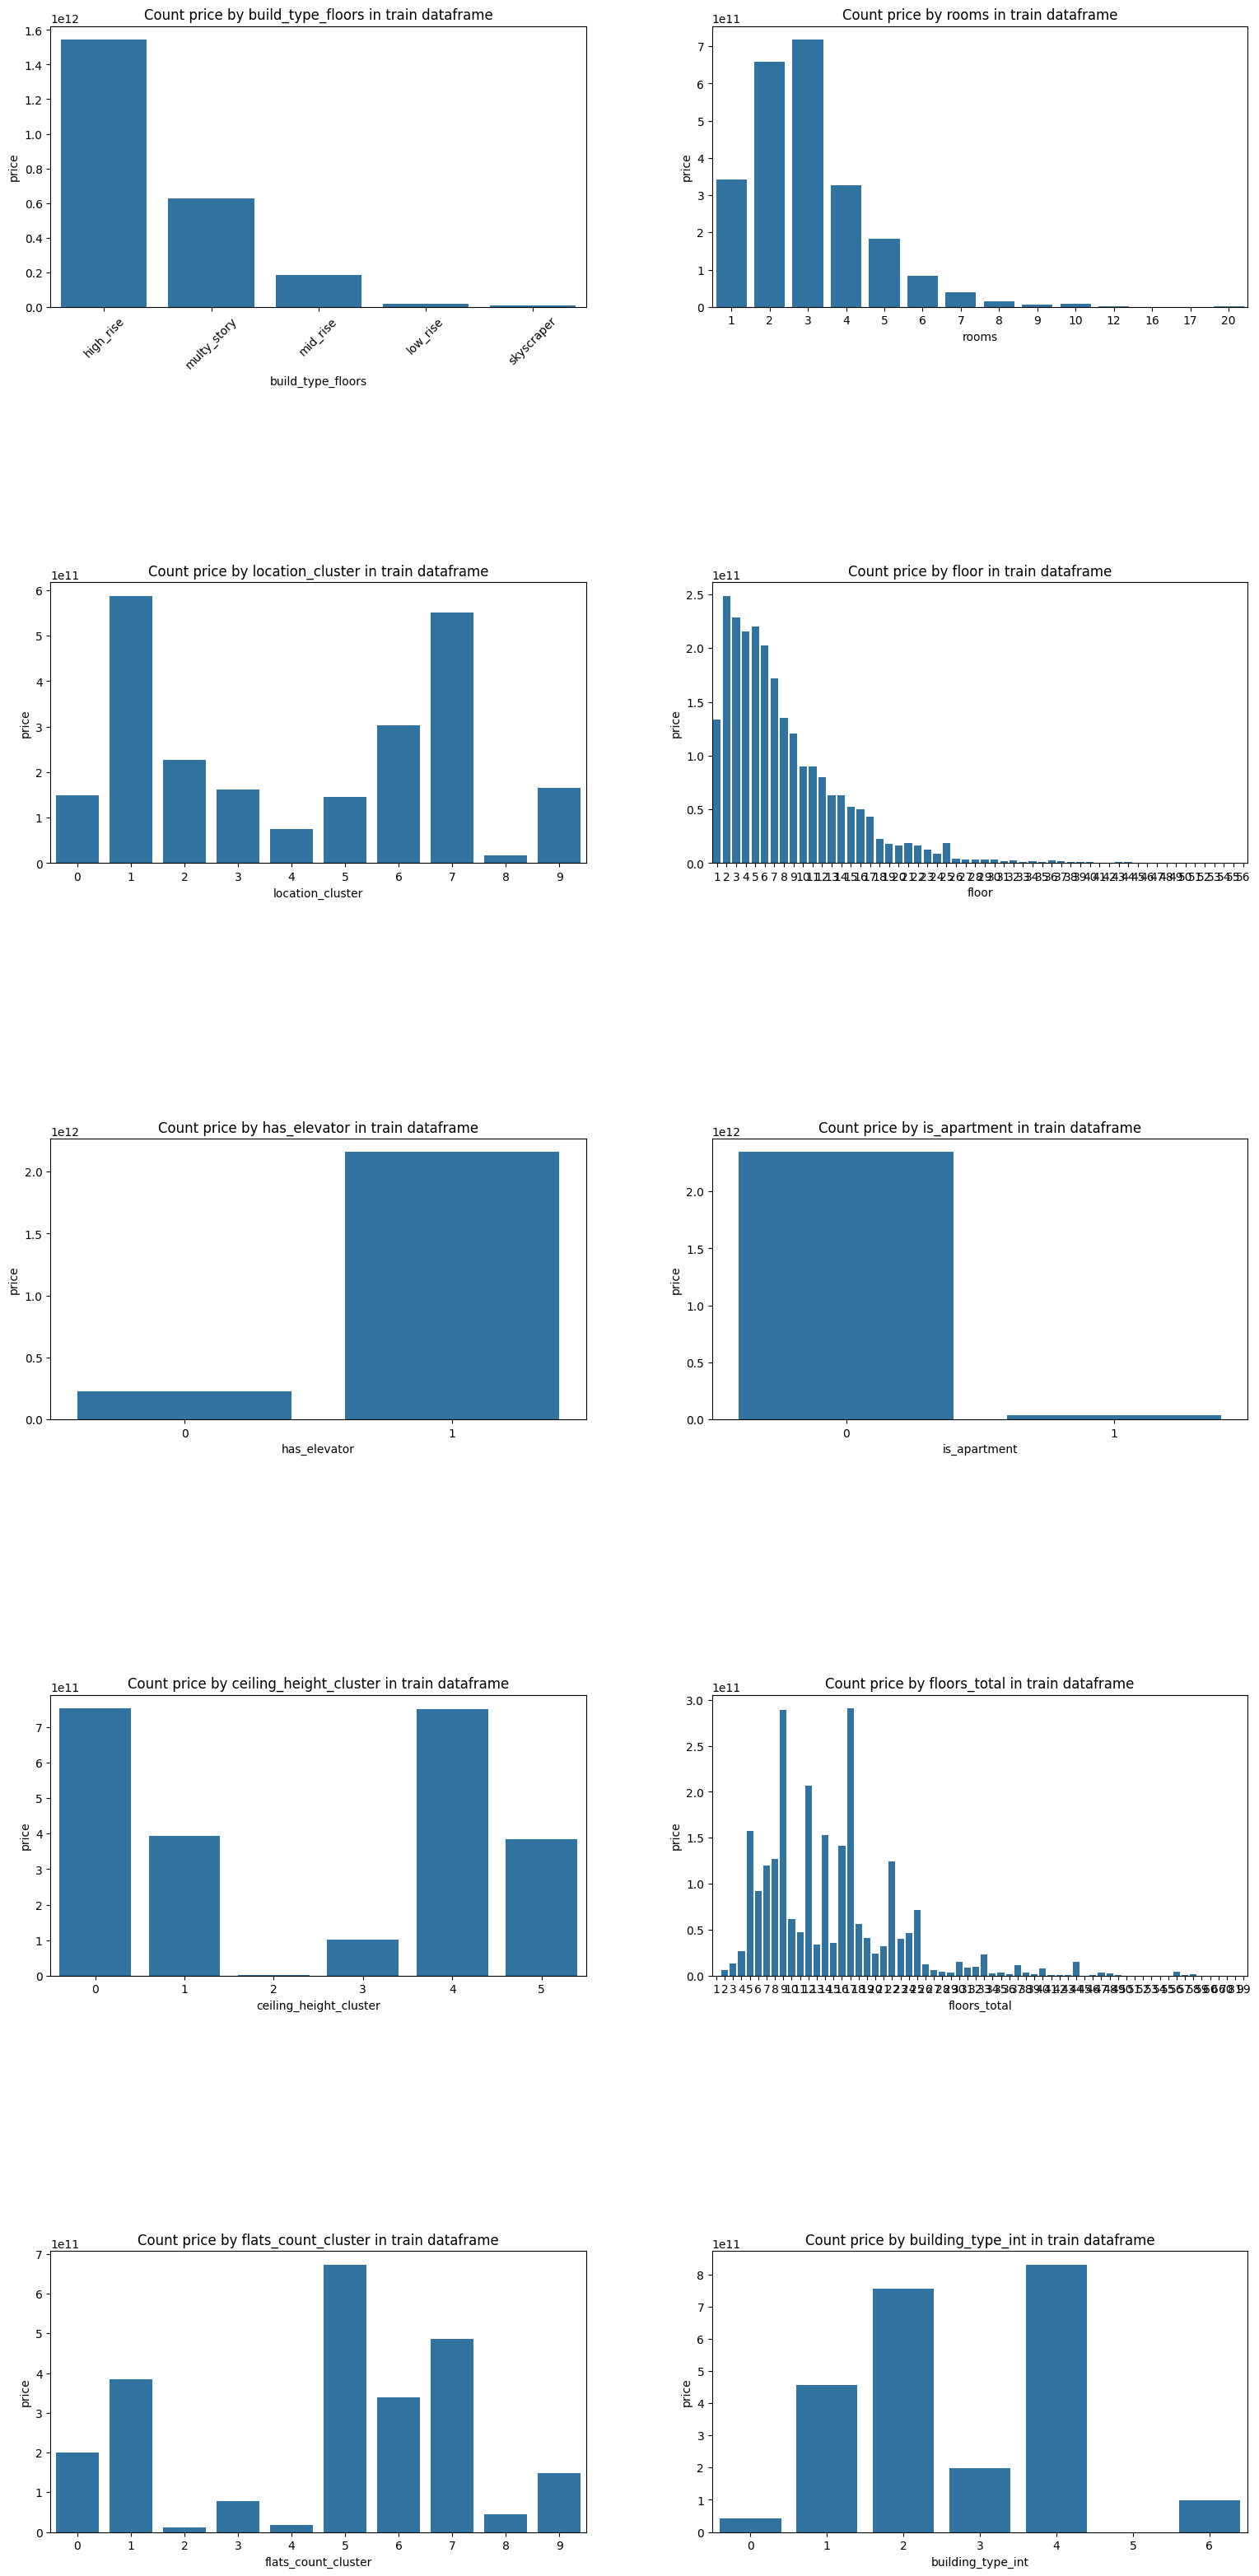

In [13]:
# 2.3 Анализ признаков для модели
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(5, 2)
fig.tight_layout(pad=1.2)
fig.set_size_inches(16.5, 35, forward=True)

# 1) зависимость цены от типа дома
x = "build_type_floors"
y = "price"
build_type_floors_agg_df = pd.DataFrame(df.groupby(x).agg({y: 'sum'})).sort_values(by='price', ascending=False).reset_index() 
sns.barplot(
    data=build_type_floors_agg_df,
    x=x,
    y=y,
    ax=axs[0, 0]
)
axs[0, 0].set_title(f'Count {y} by {x} in train dataframe')
axs[0, 0].tick_params(axis='x', labelrotation=45)

# 2) зависимость цены от количества комнат rooms
x = "rooms"
y = "price"
rooms_agg_df = pd.DataFrame(df.groupby(x).agg({y: 'sum'})).sort_values(by='rooms', ascending=False).reset_index() 
age_price = sns.barplot(
    data=rooms_agg_df,
    x=x,
    y=y,
    ax=axs[0, 1]
)
axs[0, 1].set_title(f'Count {y} by {x} in train dataframe')

# 3) зависимость цены от location_cluster	
x = "location_cluster"
y = "price"
location_clust_agg_df = pd.DataFrame(df.groupby(x).agg({y: 'sum'})).sort_values(by=x, ascending=False).reset_index() 
age_price = sns.barplot(
    data=location_clust_agg_df,
    x=x,
    y=y,
    ax=axs[1, 0]
)
axs[1, 0].set_title(f'Count {y} by {x} in train dataframe')

# 4) зависимость цены от количества этажей floor	
x = "floor"
y = "price"
floor_agg_df = pd.DataFrame(df.groupby(x).agg({y: 'sum'})).sort_values(by=x, ascending=False).reset_index() 
age_price = sns.barplot(
    data=floor_agg_df,
    x=x,
    y=y,
    ax=axs[1, 1]
)
axs[1, 1].set_title(f'Count {y} by {x} in train dataframe')

# 5) зависимость цены от наличия лифт в доме has_elevator
x = "has_elevator"
y = "price"
has_elevator_agg_df = pd.DataFrame(df.groupby(x).agg({y: 'sum'})).sort_values(by=x, ascending=False).reset_index() 
age_price = sns.barplot(
    data=has_elevator_agg_df,
    x=x,
    y=y,
    ax=axs[2, 0]
)
axs[2, 0].set_title(f'Count {y} by {x} in train dataframe')

# 6) зависимость цены от типа квартиры is_apartment
x = "is_apartment"
y = "price"
has_elevator_agg_df = pd.DataFrame(df.groupby(x).agg({y: 'sum'})).sort_values(by=x, ascending=False).reset_index() 
age_price = sns.barplot(
    data=has_elevator_agg_df,
    x=x,
    y=y,
    ax=axs[2, 1]
)
axs[2, 1].set_title(f'Count {y} by {x} in train dataframe')

# 7) зависимость цены от высоты потолков  квартире has_elevator
x = "ceiling_height_cluster"
y = "price"
ceiling_height_agg_df = pd.DataFrame(df.groupby(x).agg({y: 'sum'})).sort_values(by=x, ascending=False).reset_index() 
age_price = sns.barplot(
    data=ceiling_height_agg_df,
    x=x,
    y=y,
    ax=axs[3, 0]
)
axs[3, 0].set_title(f'Count {y} by {x} in train dataframe')

# 8) зависимость цены от количество этажей в доме
x = "floors_total"
y = "price"
floors_total_agg_df = pd.DataFrame(df.groupby(x).agg({y: 'sum'})).sort_values(by=x, ascending=False).reset_index() 
age_price = sns.barplot(
    data=floors_total_agg_df,
    x=x,
    y=y,
    ax=axs[3,1]
)
axs[3, 1].set_title(f'Count {y} by {x} in train dataframe')

# 8) зависимость цены от количество квартир в доме flats_count_cluster
x = "flats_count_cluster"
y = "price"
flats_count_cluster_agg_df = pd.DataFrame(df.groupby(x).agg({y: 'sum'})).sort_values(by=x, ascending=False).reset_index() 
age_price = sns.barplot(
    data=flats_count_cluster_agg_df,
    x=x,
    y=y,
    ax=axs[4,0]
)
axs[4, 0].set_title(f'Count {y} by {x} in train dataframe')

# 9) зависимость цены от типа здания building_type_int
x = "building_type_int"
y = "price"
building_type_int_agg_df = pd.DataFrame(df.groupby(x).agg({y: 'sum'})).sort_values(by=x, ascending=False).reset_index() 
age_price = sns.barplot(
    data=building_type_int_agg_df,
    x=x,
    y=y,
    ax=axs[4,1]
)
axs[4, 1].set_title(f'Count {y} by {x} in train dataframe')

ASSETS_DIR = '../assets'
plt.savefig(os.path.join(ASSETS_DIR, 'target_by_cat_feature'))

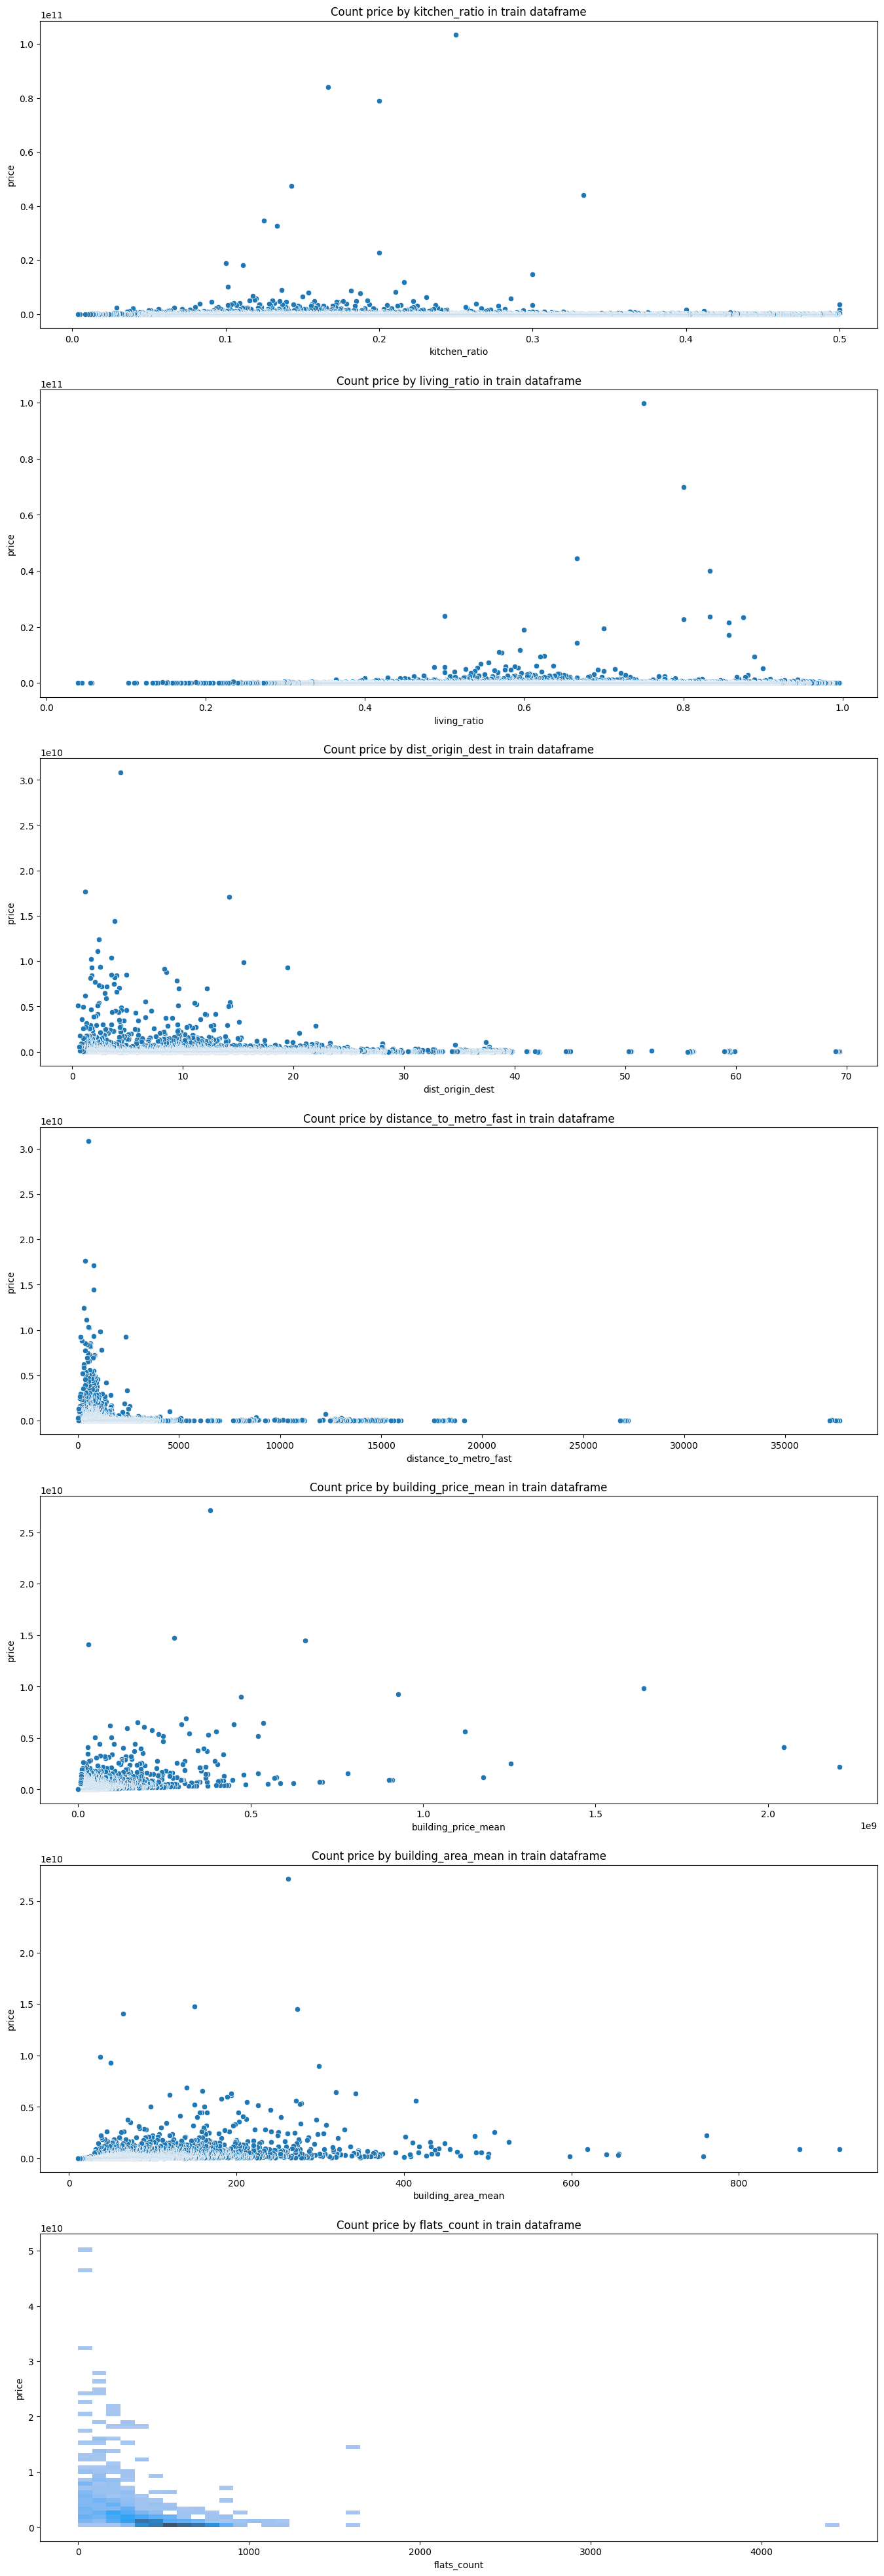

In [14]:
fig, axs = plt.subplots(7, 1)
#fig.tight_layout(pad=0.6)
fig.set_size_inches(16.5, 50, forward=True)

# 5) зависимость цены от соотношения площади кухни к общей	
x = "kitchen_ratio"
y = "price"
kitchen_ratio_agg_df = pd.DataFrame(df.groupby(x).agg({y: 'sum'})).sort_values(by=x, ascending=False).reset_index() 
age_price = sns.scatterplot(
    data=kitchen_ratio_agg_df,
    x=x,
    y=y,
    ax=axs[0]
)
axs[0].set_title(f'Count {y} by {x} in train dataframe')

# 6) зависимость цены от соотношения жилой площади к общей	
x = "living_ratio"
y = "price"
living_ratio_agg_df = pd.DataFrame(df.groupby(x).agg({y: 'sum'})).sort_values(by=x, ascending=False).reset_index() 
age_price = sns.scatterplot(
    data=living_ratio_agg_df,
    x=x,
    y=y,
    ax=axs[1]
)
axs[1].set_title(f'Count {y} by {x} in train dataframe')

# 7) зависимость цены от расстояния до центра города	
x = "dist_origin_dest"
y = "price"
dist_origin_dest_agg_df = pd.DataFrame(df.groupby(x).agg({y: 'sum'})).sort_values(by=x, ascending=False).reset_index() 
age_price = sns.scatterplot(
    data=dist_origin_dest_agg_df,
    x=x,
    y=y,
    ax=axs[2]
)
axs[2].set_title(f'Count {y} by {x} in train dataframe')

# 7) зависимость цены от расстояния до ближайшей станции метро	
x = "distance_to_metro_fast"
y = "price"
distance_to_metro_fast_agg_df = pd.DataFrame(df.groupby(x).agg({y: 'sum'})).sort_values(by=x, ascending=False).reset_index() 
age_price = sns.scatterplot(
    data=distance_to_metro_fast_agg_df,
    x=x,
    y=y,
    ax=axs[3]
)
axs[3].set_title(f'Count {y} by {x} in train dataframe')

# 8) средняя цена по зданию building_price_mean
x = "building_price_mean"
y = "price"
building_price_mean_agg_df = pd.DataFrame(df.groupby(x).agg({y: 'sum'})).sort_values(by=x, ascending=False).reset_index() 
age_price = sns.scatterplot(
    data=building_price_mean_agg_df,
    x=x,
    y=y,
    ax=axs[4]
)
axs[4].set_title(f'Count {y} by {x} in train dataframe')

# 9) средняя полощадь по зданию building_area_mean	
x = "building_area_mean"
y = "price"
building_area_mean_agg_df = pd.DataFrame(df.groupby(x).agg({y: 'sum'})).sort_values(by=x, ascending=False).reset_index() 
age_price = sns.scatterplot(
    data=building_area_mean_agg_df,
    x=x,
    y=y,
    ax=axs[5]
)
axs[5].set_title(f'Count {y} by {x} in train dataframe')


# 9) цена от количества квартир в доме flats_coun	
x = "flats_count"
y = "price"
flats_count_agg_df = pd.DataFrame(df.groupby(x).agg({y: 'sum'})).sort_values(by=x, ascending=False).reset_index() 
age_price = sns.histplot(
    data=flats_count_agg_df,
    x=x,
    y=y,
    ax=axs[6]
)
axs[6].set_title(f'Count {y} by {x} in train dataframe')

plt.savefig(os.path.join(ASSETS_DIR, 'target_by_num_feature'))

In [28]:
plt.savefig(os.path.join(ASSETS_DIR, 'target_by_num_feature'))

<Figure size 640x480 with 0 Axes>

In [3]:
df.columns

Index(['floor', 'is_apartment', 'kitchen_area', 'living_area', 'rooms',
       'studio', 'total_area', 'price', 'build_year', 'building_type_int',
       'ceiling_height', 'flats_count', 'floors_total', 'has_elevator',
       'build_type_floors', 'age', 'floor_ratio', 'kitchen_ratio',
       'living_ratio', 'building_price_mean', 'building_area_mean',
       'location_cluster', 'dist_origin_dest', 'distance_to_metro_fast',
       'ceiling_height_cluster', 'flats_count_cluster'],
      dtype='object')

In [ ]:
# 2.4 Анализ целевой переменной

In [ ]:
# 9) цена в зависимости от location_cluster и ceiling_height_cluster
sns.set_theme(style='darkgrid')

f, ax = plt.subplots(figsize=(8,8))
ax.set_aspect("equal")

sns.boxplot(
    data=df,
    x='kitchen_ratio', 
    y='living_ratio',
    hue='price', 
    gap=.1,
)

#g.set(xscale="log", yscale="log")
#g.ax.xaxis.grid(True, 'minor', linewidth=.25)
#g.ax.yaxis.grid(True, 'minor', linewidth=.25)
#g.despine(left=True, bottom=True)

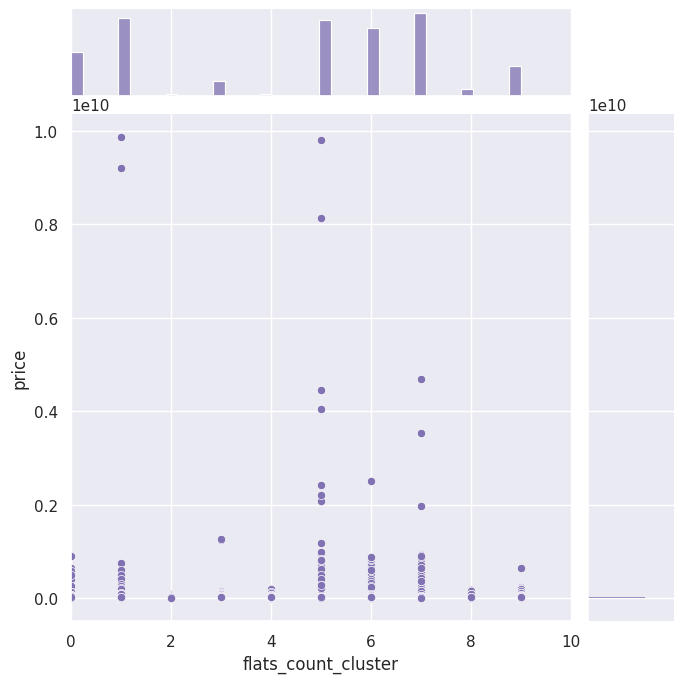

In [50]:
g = sns.jointplot(x='flats_count_cluster',
                  y='price',
                  data=df,
                  kind='scatter',
                  #truncate=True,
                  xlim=(0,10),
                  color='m',
                  height=7)

In [ ]:
# 2.4 Анализ целевой переменной в зависимости от различных признаков

In [ ]:
# 2.5 Выводы после EDA

In [ ]:
# 2.6 логирование артефактов в MLflow

#### Этап 3: Генерация Признаков и Обучение Новой Версии Модели
После тщательного исследовательского анализа данных (EDA), вы, скорее всего, сформировали несколько гипотез относительно новых признаков, которые могут улучшить качество вашей модели. На этом этапе, мы предлагаем вам приступить к генерации новых признаков и последующему обучению модели, используя два подхода:

Ручная генерация признаков: Используйте ваше понимание данных и результаты EDA для создания новых признаков.
Автоматическая генерация признаков: Воспользуйтесь библиотеками для автоматической генерации признаков, чтобы облегчить и ускорить этот процесс.
Важно: Для признаков, созданных вручную, рекомендуется использовать объекты sklearn, такие как Pipeline и ColumnTransformer. Это позволит автоматизировать процесс преобразования данных и облегчить поддержку вашего проекта.

После генерации новых признаков, наступает время обучить новую версию вашей модели, используя эти признаки. Не забудьте залогировать все результаты, включая новые признаки, параметры модели и метрики качества, в MLflow для удобства отслеживания изменений и результатов.

Рекомендуемые шаги:

- Определение и генерация новых признаков на основе ваших гипотез.
- Использование библиотек для автоматической генерации признаков, если это применимо.
- Интеграция новых признаков в вашу модель с помощью Pipeline или ColumnTransformer для ручно созданных признаков.
- Обучение новой версии модели с использованием всех доступных признаков.
- Логирование результатов в MLflow для документирования и анализа эффективности новых признаков и модели.

Этот этап проекта критически важен для повышения точности и эффективности вашей модели. Тщательная работа на этом этапе может существенно повлиять на итоговое качество моделирования.


In [ ]:
# 3.1 ручная генерация признаков

In [ ]:
# 3.2 оборачивание всех преобразований в объекты sklearn

In [ ]:
# 3.3 автоматическая генерация признаков

In [ ]:
# 3.4 обучение новой версии модели

In [ ]:
# 3.5 логирование артефактов в MLflow

#### Этап 4: Отбор Признаков и Обучение Новой Версии Модели
Создание новых признаков — это лишь часть работы. Следующий важный шаг — это убедиться в том, что каждый из этих признаков действительно вносит положительный вклад в качество модели. Некоторые признаки могут оказывать отрицательное влияние на модель, поэтому их следует исключить из анализа.

На этом этапе, мы рекомендуем вам применить различные методы отбора признаков для того, чтобы определить и удалить те признаки, которые не улучшают качество вашей модели. Цель этого этапа — максимизировать производительность модели, удалив избыточные или неинформативные признаки.

После тщательного отбора признаков, пора обучить новую версию вашей модели, уже без негативно влияющих на неё признаков. Важно залогировать результаты этого этапа, включая измененный набор признаков, параметры модели и полученные метрики качества, в MLflow для последующего анализа и сравнения.

Рекомендуемые шаги:

- Применение методов отбора признаков для идентификации и исключения признаков, ухудшающих качество модели.
- Анализ влияния каждого признака на модель, чтобы понять, какие из них наиболее ценные.
- Обучение новой версии модели без негативно влияющих признаков.
- Логирование всех изменений и результатов в MLflow, включая конечный набор признаков, параметры модели и метрики качества.

Этот этап не только поможет улучшить качество вашей модели, но и даст глубокое понимание о важности и влиянии отдельных признаков на результаты моделирования.


In [ ]:
# 4.1 Отбор признаков при помощи метода номер 1

In [ ]:
# 4.2 Отбор признаков при помощи метода номер 2

In [ ]:
# 4.3 Анализ отобранных признаков при помощи двух методов и формирование финального списка с признаками для модели

In [ ]:
# 4.4 Обучение новой версии модели

In [ ]:
# 4.5 Логирование всех артефактов в MLflow

### Этап 5 - подбор гиперпараметров и обучение новой версии модели
После того как мы уделили значительное внимание качеству модели через создание и отбор признаков, пришло время для финального штриха — подбора гиперпараметров. Этот этап является ключевым в финальной части проекта второго спринта, где ваша задача — оптимизировать гиперпараметры модели для достижения наилучшего качества.

Рекомендуется подобрать гиперпараметры как минимум двумя различными методами (например, с использованием Grid Search и Random Search), чтобы вы могли сравнить результаты и выбрать наиболее эффективный набор гиперпараметров для вашей модели. После определения оптимальных гиперпараметров, наступает время обучить финальную версию модели, используя ваши новые признаки.

Рекомендуемые шаги:

- Выбор методов для подбора гиперпараметров: Определитесь с методами, которые вы будете использовать для подбора гиперпараметров (например, Grid Search, Random Search, Bayesian Optimization).
- Подбор гиперпараметров: Примените выбранные методы для нахождения оптимальных значений гиперпараметров вашей модели.
- Сравнение результатов: Анализируйте и сравнивайте результаты, полученные различными методами, для определения наилучшего набора гиперпараметров.
- Обучение финальной модели: Используя выбранные гиперпараметры, обучите финальную версию вашей модели на новых признаках.
- Документирование процесса и результатов: Залогируйте все шаги и результаты в MLflow, включая сравнение методов подбора гиперпараметров и характеристики финальной модели.

Этот этап позволит вам максимально улучшить качество вашей модели перед финальной оценкой, предоставив полное понимание важности и влияния гиперпараметров на производительность модели.

In [ ]:
# 5.1 Подбор гиперпарметров при мощи метода номер 1

In [ ]:
# 5.2 Подбор гиперпарметров при мощи метода номер 2

In [ ]:
# 5.3 Формирование списка гиперпараметров для новой модели

In [ ]:
# 5.4 Обуение финальной версии модели

In [ ]:
# 5.5 Логирование артефактов в MLflow